In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
js = json.load(open('data/annotations/instances_val2017.json', 'r'))

In [3]:
js.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

### load in dataframe

In [7]:
cat_df = pd.DataFrame(js['categories'])
image_df = pd.DataFrame(js['images'])
anno_df = pd.DataFrame(js['annotations'])

In [29]:
print(cat_df.shape)
cat_df.head(20)

(80, 3)


,supercategory,id,name
0,person,1,person
1,vehicle,2,bicycle
2,vehicle,3,car
3,vehicle,4,motorcycle
4,vehicle,5,airplane
5,vehicle,6,bus
6,vehicle,7,train
7,vehicle,8,truck
8,vehicle,9,boat
9,outdoor,10,traffic light


In [13]:
print(image_df.shape)
image_df.head()

(5000, 8)


,license,file_name,coco_url,height,width,date_captured,flickr_url,id
0,4,000000397133.jpg,http://images.cocodataset.org/val2017/00000039...,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_...,397133
1,1,000000037777.jpg,http://images.cocodataset.org/val2017/00000003...,230,352,2013-11-14 20:55:31,http://farm9.staticflickr.com/8429/7839199426_...,37777
2,4,000000252219.jpg,http://images.cocodataset.org/val2017/00000025...,428,640,2013-11-14 22:32:02,http://farm4.staticflickr.com/3446/3232237447_...,252219
3,1,000000087038.jpg,http://images.cocodataset.org/val2017/00000008...,480,640,2013-11-14 23:11:37,http://farm8.staticflickr.com/7355/8825114508_...,87038
4,6,000000174482.jpg,http://images.cocodataset.org/val2017/00000017...,388,640,2013-11-14 23:16:55,http://farm8.staticflickr.com/7020/6478877255_...,174482


In [12]:
print(anno_df.shape)
anno_df.head()

(36781, 7)


,segmentation,area,iscrowd,image_id,bbox,category_id,id
0,"[[510.66, 423.01, 511.72, 420.03, 510.45, 416....",702.10575,0,289343,"[473.07, 395.93, 38.65, 28.67]",18,1768
1,"[[289.74, 443.39, 302.29, 445.32, 308.09, 427....",27718.47630,0,61471,"[272.1, 200.23, 151.97, 279.77]",18,1773
2,"[[147.76, 396.11, 158.48, 355.91, 153.12, 347....",78969.31690,0,472375,"[124.71, 196.18, 372.85, 356.81]",18,2551
3,"[[260.4, 231.26, 215.06, 274.01, 194.33, 307.6...",108316.66515,0,520301,"[112.71, 154.82, 367.29, 479.35]",18,3186
4,"[[200.61, 253.97, 273.19, 318.49, 302.43, 336....",75864.53530,0,579321,"[200.61, 89.65, 400.22, 251.02]",18,3419


### About coco data

- Single image has multiple object, so for a single might be possible having more than 1 annotation.
- Here we are targetting few sub-categories only [1, 3, 4, 10] for learning purpose.
- For image classification task, we are using box portion of image instead of using complete image to predict a object.
- coco prefix url for viewing image is http://images.cocodataset.org/val2017/{file_name}

In [15]:
image_cols = ['file_name', 'id']
anno_cols = ['image_id', 'bbox', 'category_id', 'id']
image_df = image_df[image_cols]
anno_df = anno_df[anno_cols]

In [19]:
# join between to df
data_df = pd.merge(anno_df, image_df.rename(columns={'id':'image_id'}), how='inner', on='image_id')

In [20]:
data_df.shape

(36781, 5)

In [21]:
data_df.head()

,image_id,bbox,category_id,id,file_name
0,289343,"[473.07, 395.93, 38.65, 28.67]",18,1768,000000289343.jpg
1,289343,"[204.01, 235.08, 60.84, 177.36]",1,201376,000000289343.jpg
2,289343,"[0.43, 499.79, 339.79, 106.45]",15,575188,000000289343.jpg
3,289343,"[204.42, 304.1, 52.51, 152.76]",2,2168354,000000289343.jpg
4,61471,"[272.1, 200.23, 151.97, 279.77]",18,1773,000000061471.jpg


In [36]:
# top 10 items we pick
cat_li = list(data_df['category_id'].value_counts().iloc[:10].keys())
cat_df[cat_df['id'].isin(cat_li)]

,supercategory,id,name
0,person,1,person
2,vehicle,3,car
9,outdoor,10,traffic light
26,accessory,31,handbag
39,kitchen,44,bottle
41,kitchen,47,cup
45,kitchen,51,bowl
56,furniture,62,chair
60,furniture,67,dining table
73,indoor,84,book


In [100]:
ids = cat_df[cat_df['id'].isin(cat_li)]['id']
names = cat_df[cat_df['id'].isin(cat_li)]['name']
cat =dict(zip(ids,names))

In [101]:
cat

{1: 'person',
 3: 'car',
 10: 'traffic light',
 31: 'handbag',
 44: 'bottle',
 47: 'cup',
 51: 'bowl',
 62: 'chair',
 67: 'dining table',
 84: 'book'}

In [1]:
json.dump(cat, open('data/sampled_categories.json','w'))

NameError: name 'json' is not defined

In [37]:
sdata_df = data_df[data_df['category_id'].isin(cat_li)]
sdata_df.shape

(20312, 5)

<AxesSubplot:>

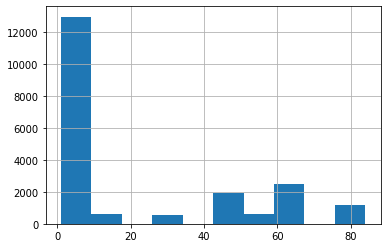

In [38]:
sdata_df['category_id'].hist()

In [84]:
n_c1 = sdata_df[(sdata_df['category_id'] == 1)].shape[0]
c1_index = sdata_df[sdata_df['category_id'] == 1].sample(int(n_c1*0.8)).index


In [86]:
sdata_df.drop(index=c1_index, inplace=True)

c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

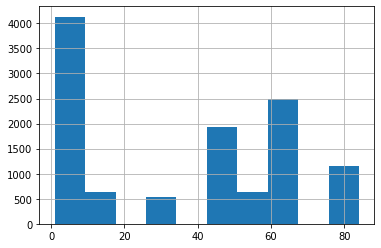

In [88]:
sdata_df['category_id'].hist()

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
train, val = train_test_split(sdata_df, train_size=0.8, shuffle=True, random_state=1, stratify=sdata_df['category_id'])

In [93]:
train.to_csv("data/train.csv",index=False)
val.to_csv("data/val.csv",index=False)

In [48]:
from PIL import Image

image_id                              308545
bbox           [175.0, 101.4, 463.2, 325.33]
category_id                                1
id                                    217649
file_name                   000000308545.jpg
Name: 16906, dtype: object


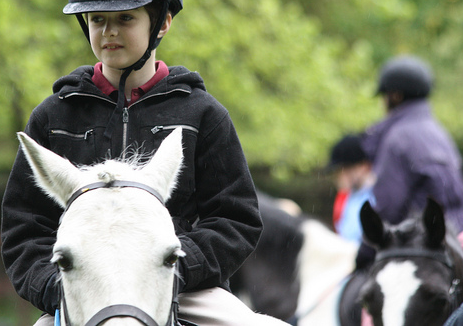

In [74]:
l = sdata_df.sample(1).iloc[0]
image_path = f"data/val2017/{l['file_name']}"
img = Image.open(image_path)
print(l)
p = l['bbox']
box = [p[0], p[1] , p[0]+p[2], p[1]+p[3] ]

img.crop(box=box)